### RECORTANDO SHAPES

In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [29]:
#Script para automatizar recorte da shape de municípios de acordo com o estado escolhido
#Função para ler arquivos shapefile
def arquivos():
    arq = []
    while True:
        arq.append(input("Digite o caminho para os shapefiles a serem recortados: ")
                  + '\\' + input("Digite o nome do shapefile: ") + '.shp')
        esc = input('Deseja incluir outro arquivo? [S/N] ').strip().upper()[0]
        while 'N' not in esc and 'S' not in esc:
            esc = input('Escolha inválida! Digite S para "Sim" ou N para "Não": ').strip().upper()[0]
        if esc == 'N':
            break
    return arq

#Função para abrir shapefiles com geopandas
def open_shape():
    
    return [gpd.read_file(i) for i in arquivos()]

#Função para filtrar o estado selecionado
def filtro(estado, mun):
    filtro_municipio = mun[mun['uf'] == estado]
    return filtro_municipio

#Função para recortar a shape incluída dentro do estado selecionado
def overlay():
    recorte = []
    for shapes in open_shape():
        recorte.append(gpd.overlay(shapes, filtro(estado, mun), how='intersection', keep_geom_type=False))
    return recorte

#Função para plotar os dados recortados sobrepostos ao estado selecionado
def func_plot():
    state = filtro(estado, mun)
    #Configurando o layout das áreas recortadas
    for shp in overlay():
        fig, ax = plt.subplots(1,1,figsize=(10,10))
        ax.set_title(f'Áreas recortadas')
        base_mun = filtro(estado, mun).plot(ax=ax, color='gray', linewidth=0.1, edgecolor='black')
        shp.plot(ax=base_mun, color='orange', markersize=7.5, linestyle='dashed', linewidth=1, marker='^')

#Função para chamar e executar as outras funções e exibir o shape de resultado
def run():
    # for r in overlay():
    #     r.plot()
    return func_plot()

Digite o caminho para o arquivo shape dos municípios:  C:\Users\rodri\Downloads\projeto3.8\.venv\Scripts\python_gis\dados
Digite o nome do arquivo shape dos municípios:  municipios
Digite a UF desejada:  sp
Digite o caminho para os shapefiles a serem recortados:  C:\Users\rodri\Downloads\projeto3.8\.venv\Scripts\python_gis\dados
Digite o nome do shapefile:  aeroportos
Deseja incluir outro arquivo? [S/N]  s
Digite o caminho para os shapefiles a serem recortados:  C:\Users\rodri\Downloads\projeto3.8\.venv\Scripts\python_gis\dados
Digite o nome do shapefile:  rodovias
Deseja incluir outro arquivo? [S/N]  n


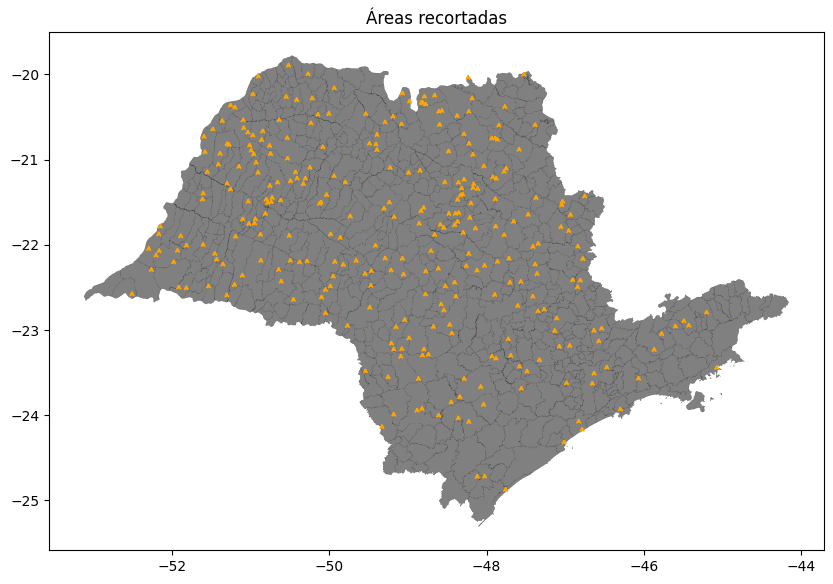

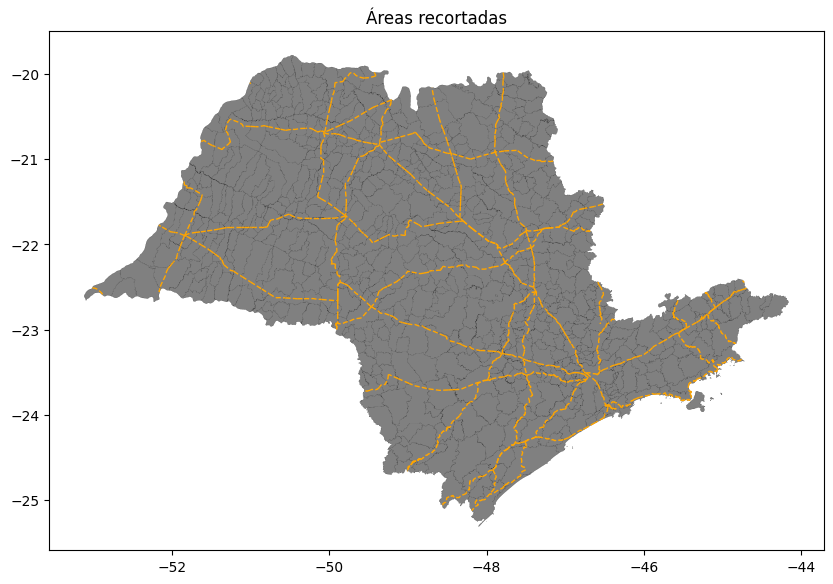

In [32]:
mun = gpd.read_file(input('Digite o caminho para o arquivo shape dos municípios: ')
                   + '\\' + input('Digite o nome do arquivo shape dos municípios: ') + '.shp')
estado = input("Digite a UF desejada: ").upper()
run()